# Example dot tuning

In [1]:
from qcodes import Station
import nanotune as nt
from nanotune.tuningstages.settings import DataSettings, SetpointSettings, Classifiers
from nanotune.tests.functional_tests.sim_tuner import SimDotTuner
from nanotune.drivers.mock_dac import MockDAC, MockDACChannel
from nanotune.tests.mock_classifier import MockClassifer
from sim.qcodes_mocks import MockDoubleQuantumDotInstrument
from load_sim_scenarios import sim_scenario_dottuning
from load_sim_device import load_sim_device

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jana/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jana/.qcodes/logs/210816-21779-qcodes.log


# Load instruments and simulator to play back data
We use a MockDAC and a simulator to replace a real setup.
The simulator takes previously measured data and plays it back. It needs to be initialized and added to the station.

In [2]:
station = Station()
dac = MockDAC('dac', MockDACChannel)
station.add_component(dac)

qd_mock_instrument = MockDoubleQuantumDotInstrument('qd_mock_instrument')
station.add_component(qd_mock_instrument, name="qd_mock_instrument")

'qd_mock_instrument'

Now we load the device and overwrite the channel's voltage parameters with the simulator's pin voltages.
Then the simulation scenario is loaded, i.e. we tell the simulator which data to play back and update the device's normalization constants. In a real measurement, the normalization constants need to be measured. Unfortunately this is currently not supported by the simulator.

In [3]:
device = load_sim_device(station, "./chip.yaml")
sim_sceanrio = sim_scenario_dottuning(station)
device.normalization_constants

2021-08-16 15:32:12,251 ¦ nanotune.device.device ¦ WARNING ¦ device ¦ _check_and_update_new_voltage_range ¦ 596 ¦ Current voltage not within new valid range.
2021-08-16 15:32:12,252 ¦ nanotune.device.device ¦ WARNING ¦ device ¦ _check_and_update_new_voltage_range ¦ 596 ¦ Current voltage not within new valid range.


NormalizationConstants(transport=(0, 1.93e-09), sensing=(0, 1), rf=(0, 1))

# Initialize tuner
We use the SimDotTuner here, which is a subclass of the DotTuner with the only difference that before each measurement, the data simulated is advanced to replay the next dataset.

In [4]:
settings = {
    "name": "test_tuner",
    "data_settings": DataSettings(
        db_name="dot_tuning_example.db",
        db_folder='.',
        segment_db_name="dot_segments_temp.db",
        segment_db_folder='.',
    ),
    "classifiers": Classifiers(
        pinchoff=MockClassifer(category="pinchoff"),
        singledot=MockClassifer(category="singledot"),
        doubledot=MockClassifer(category="doubledot"),
        dotregime=MockClassifer(category="dotregime")),
    "setpoint_settings": SetpointSettings(
        voltage_precision=0.001,
        ranges_to_sweep=[(-1, 0)],
        safety_voltage_ranges=[(-2, 0)],
    ),
}

In [5]:
dottuner = SimDotTuner(
    **settings, 
    sim_scenario=sim_sceanrio,
)

Starting experimental run with id: 30. 


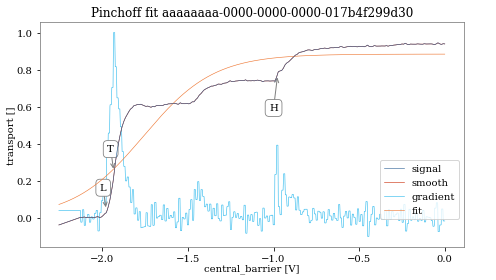

gatecharacterization1d: Good result measured. Regime: pinchoff. Termination reasons: max_n_iterations reached. 
Starting experimental run with id: 31. 


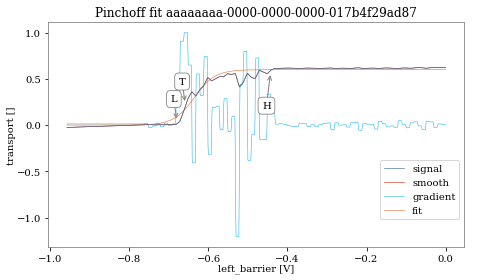

gatecharacterization1d: Good result measured. Regime: pinchoff. Termination reasons: max_n_iterations reached. 
Starting experimental run with id: 32. 


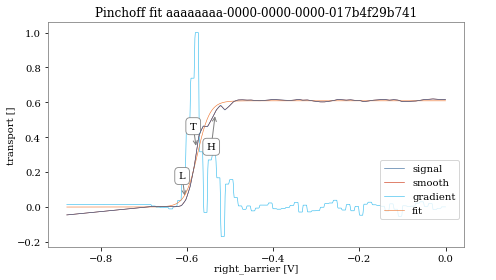

gatecharacterization1d: Good result measured. Regime: pinchoff. Termination reasons: max_n_iterations reached. 
Starting experimental run with id: 33. 


2021-08-16 15:32:22,132 ¦ nanotune.data.dataset ¦ WARNING ¦ dataset ¦ _normalize_data ¦ 277 ¦ ('Dataset 33: ', 'Wrong normalization constant')
2021-08-16 15:32:22,196 ¦ nanotune.data.dataset ¦ WARNING ¦ dataset ¦ _normalize_data ¦ 277 ¦ ('Dataset 33: ', 'Wrong normalization constant')
2021-08-16 15:32:22,269 ¦ nanotune.data.dataset ¦ WARNING ¦ dataset ¦ _normalize_data ¦ 277 ¦ ('Dataset 33: ', 'Wrong normalization constant')


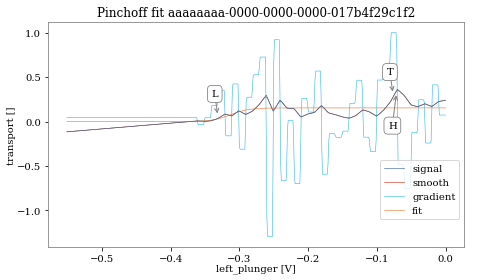

2021-08-16 15:32:24,158 ¦ nanotune.device.device ¦ WARNING ¦ device ¦ _check_and_update_new_voltage_range ¦ 596 ¦ Current voltage not within new valid range.


gatecharacterization1d: Good result measured. Regime: pinchoff. Termination reasons: max_n_iterations reached. 
Starting experimental run with id: 34. 


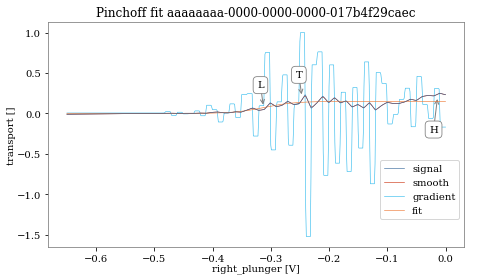

2021-08-16 15:32:26,806 ¦ nanotune.device.device ¦ WARNING ¦ device ¦ _check_and_update_new_voltage_range ¦ 596 ¦ Current voltage not within new valid range.


gatecharacterization1d: Good result measured. Regime: pinchoff. Termination reasons: max_n_iterations reached. 
Starting experimental run with id: 35. 
Starting experimental run with id: 101. 
Starting experimental run with id: 102. 
Starting experimental run with id: 103. 
Starting experimental run with id: 104. 
Starting experimental run with id: 105. 
Starting experimental run with id: 106. 
Starting experimental run with id: 107. 
Starting experimental run with id: 108. 
Starting experimental run with id: 109. 
Starting experimental run with id: 110. 
Starting experimental run with id: 111. 
Starting experimental run with id: 112. 
Starting experimental run with id: 113. 
Starting experimental run with id: 114. 
Starting experimental run with id: 115. 
Starting experimental run with id: 116. 
Starting experimental run with id: 117. 
Starting experimental run with id: 118. 
Starting experimental run with id: 119. 
Starting experimental run with id: 120. 
Starting experimental run wi

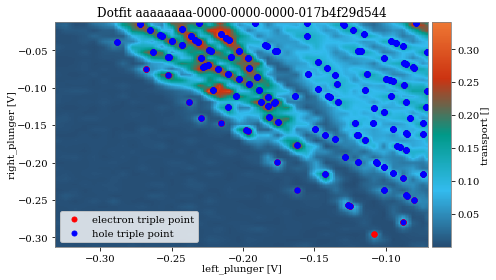

chargediagram: Good result measured. Regime: doubledot. Termination reasons: None. 


True

In [6]:
dottuner.tune_dot_regime(device)

The tuning result is saved in the tuner's tuning history.

In [7]:
dottuner.tuning_history.results[device.name].tuningresults.keys()

dict_keys(['gatecharacterization1d', 'gatecharacterization1d_31', 'gatecharacterization1d_32', 'gatecharacterization1d_33', 'gatecharacterization1d_34', 'chargediagram'])

The valid ranges found during tuning can be accessed via the current valid ranges attribute.

In [8]:
device.current_valid_ranges()

{0: [-0.9, -0.6],
 1: [-0.679226408802934, -0.44214738246082],
 2: [-0.331110370123374, -0.0710236745581861],
 3: [-1.97565855285095, -0.974324774924975],
 4: [-0.312104034678226, -0.0130043347782594],
 5: [-0.603201067022341, -0.533177725908636]}